<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/S%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from numpy import array
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


In [2]:
resturantreviews = pd.read_csv("sentiment (3).csv")
resturantreviews=resturantreviews.dropna(axis=0)
resturantreviews.isnull().values.any()
resturantreviews.shape

(6799, 13)

In [3]:
resturantreviews.head()

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,Processed_Tweets,Polarity,Sentiment
1,1,2022-12-14 12:32:07+00:00,1603004910664138752,https://twitter.com/TheSun/status/160300491066...,TheSun,Echobox,London,Play our World Cup score predictor for a chanc...,0,0,play our world cup score predictor for a chanc...,0.800000,Positive
4,4,2022-12-14 12:32:05+00:00,1603004900388270081,https://twitter.com/MehtooCozy/status/16030049...,MehtooCozy,Twitter Web App,Ohio,@FIFAWorldCup First Team Morocco\n\nFirst scor...,0,0,first team morocco first scorer boufal,0.250000,Positive
6,6,2022-12-14 12:32:05+00:00,1603004899884961792,https://twitter.com/God_xMidnight/status/16030...,God_xMidnight,Twitter Web App,"Malmö, Sverige",@SiavoushF kinda high stake game. Add to that ...,0,0,kinda high stake game add to that all the chea...,0.310000,Positive
11,11,2022-12-14 12:32:02+00:00,1603004889034006529,https://twitter.com/paitman1976/status/1603004...,paitman1976,Twitter Web App,United States,Exposing The Darkness (https://t.co/GVfIPV1Cm3...,0,0,exposing the darkness third journalist died su...,0.025000,Positive
12,12,2022-12-14 12:32:02+00:00,1603004887024996352,https://twitter.com/TopKniFe_B/status/16030048...,TopKniFe_B,Twitter for iPhone,citizen of the world,Good luck to the first Arab African Muslim Cou...,0,0,good luck to the first arab african muslim cou...,0.054687,Positive


In [4]:
resturantreviews["tweet"]

1        Play our World Cup score predictor for a chanc...
4        @FIFAWorldCup First Team Morocco\n\nFirst scor...
6        @SiavoushF kinda high stake game. Add to that ...
11       Exposing The Darkness (https://t.co/GVfIPV1Cm3...
12       Good luck to the first Arab African Muslim Cou...
                               ...                        
19984    @omaakatugba Well said egbon\n\nNow people no ...
19986    @Unclegold1 @KingOlaszn If Messi wins the worl...
19988    Roy Keane : "It doesn't matter who wins the Go...
19992    @GNev2 Oh you back from your bloody stained Jo...
19995    Ronaldo fans are here crying about the 5 penal...
Name: tweet, Length: 6799, dtype: object

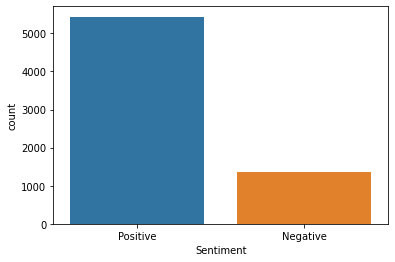

In [5]:
import seaborn as sns
sns.countplot(x='Sentiment', data=resturantreviews)
plt.show()

In [6]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [7]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [8]:
X = []
sentences = list(resturantreviews['tweet'])
for sen1 in sentences:
    X.append(preprocess_text(str(sen1)))

In [9]:
y=resturantreviews['Sentiment']
y = np.array(list(map(lambda x: 1 if x=="Positive" else 0, y)))
y

array([1, 1, 1, ..., 1, 0, 1])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [11]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [12]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [13]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [14]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [15]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1687300   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 1,697,301
Trainable params: 10,001
Non-trainable params: 1,687,300
_________________________________________________________________
None


In [17]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
34/34 [==============================] - 2s 14ms/step - loss: 0.5129 - acc: 0.8028 - val_loss: 0.5028 - val_acc: 0.7987
Epoch 2/6
34/34 [==============================] - 0s 8ms/step - loss: 0.4513 - acc: 0.8088 - val_loss: 0.4933 - val_acc: 0.7996
Epoch 3/6
34/34 [==============================] - 0s 7ms/step - loss: 0.4157 - acc: 0.8148 - val_loss: 0.4833 - val_acc: 0.7996
Epoch 4/6
34/34 [==============================] - 0s 7ms/step - loss: 0.3909 - acc: 0.8230 - val_loss: 0.4801 - val_acc: 0.7950
Epoch 5/6
34/34 [==============================] - 0s 7ms/step - loss: 0.3698 - acc: 0.8348 - val_loss: 0.4781 - val_acc: 0.7978
Epoch 6/6
34/34 [==============================] - 0s 7ms/step - loss: 0.3514 - acc: 0.8462 - val_loss: 0.4775 - val_acc: 0.7950


In [18]:
score = model.evaluate(X_test, y_test, verbose=1)

43/43 [==============================] - 0s 2ms/step - loss: 0.4879 - acc: 0.7919


In [19]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4878787398338318
Test Accuracy: 0.791911780834198


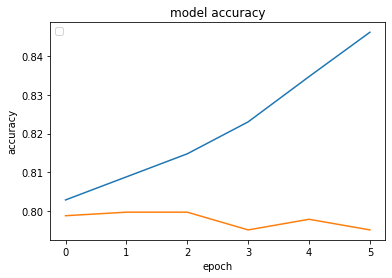

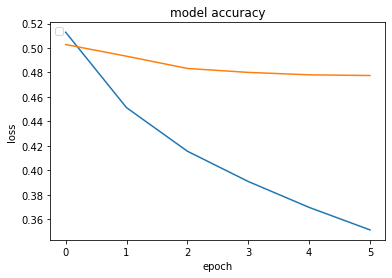

In [20]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

LSTM EVRİŞİMLİ SİNİR AĞLARI SINIFLANDIRMA

In [21]:

from keras.layers import Conv1D
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [22]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1687300   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,751,557
Trainable params: 64,257
Non-trainable params: 1,687,300
_________________________________________________________________
None


In [23]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
34/34 [==============================] - 5s 124ms/step - loss: 0.4749 - acc: 0.8074 - val_loss: 0.4406 - val_acc: 0.8125
Epoch 2/6
34/34 [==============================] - 3s 88ms/step - loss: 0.3746 - acc: 0.8311 - val_loss: 0.4031 - val_acc: 0.8162
Epoch 3/6
34/34 [==============================] - 3s 88ms/step - loss: 0.3167 - acc: 0.8564 - val_loss: 0.3821 - val_acc: 0.8189
Epoch 4/6
34/34 [==============================] - 3s 86ms/step - loss: 0.2735 - acc: 0.8835 - val_loss: 0.3788 - val_acc: 0.8290
Epoch 5/6
34/34 [==============================] - 3s 86ms/step - loss: 0.2326 - acc: 0.9157 - val_loss: 0.3651 - val_acc: 0.8327
Epoch 6/6
43/43 [==============================] - 0s 10ms/step - loss: 0.3676 - acc: 0.8478


In [24]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3675861954689026
Test Accuracy: 0.8477941155433655


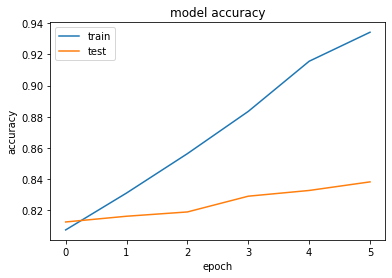

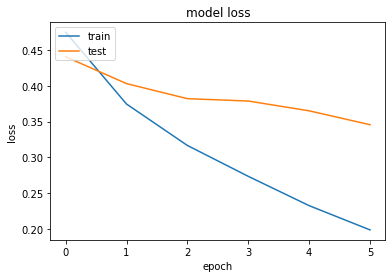

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

TEKRARLAYAN SİNİR AĞI MODELİ İLE METİN SINIFLANDIRMA

In [26]:
from tensorflow.keras.layers import LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [27]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1687300   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,804,677
Trainable params: 117,377
Non-trainable params: 1,687,300
_________________________________________________________________
None


In [28]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
34/34 [==============================] - 16s 399ms/step - loss: 0.5473 - acc: 0.7925 - val_loss: 0.5038 - val_acc: 0.8006
Epoch 2/6
34/34 [==============================] - 11s 311ms/step - loss: 0.4920 - acc: 0.8067 - val_loss: 0.4996 - val_acc: 0.8006
Epoch 3/6
34/34 [==============================] - 11s 315ms/step - loss: 0.4921 - acc: 0.8067 - val_loss: 0.5025 - val_acc: 0.8006
Epoch 4/6
34/34 [==============================] - 11s 313ms/step - loss: 0.4921 - acc: 0.8067 - val_loss: 0.4997 - val_acc: 0.8006
Epoch 5/6
34/34 [==============================] - 11s 335ms/step - loss: 0.4918 - acc: 0.8067 - val_loss: 0.5005 - val_acc: 0.8006
Epoch 6/6
43/43 [==============================] - 2s 50ms/step - loss: 0.5313 - acc: 0.7765


In [29]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5313389897346497
Test Accuracy: 0.7764706015586853


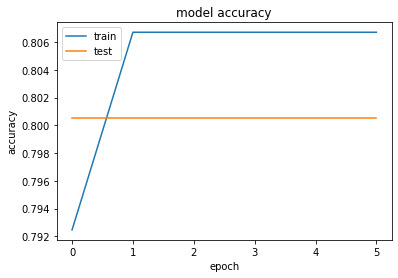

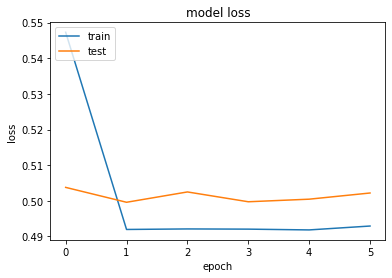

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [33]:
instance = X[402]
print(instance)

Whoever chose the commentators and pundits for the BBC and itv world cup needs to be sacked the most boring and soulless bunch we ve had the misfortune to hear from with few exceptions 


In [34]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

1/1 [==============================] - 0s 27ms/step


array([[0.764303]], dtype=float32)